<a href="https://colab.research.google.com/github/agoritma/flower-classifier/blob/main/flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Depedencies

In [1]:
!pip install kagglehub
# !pip install tensorflow
# !pip install matplotlib
# !pip install numpy

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Downloading Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/flowers-dataset")

print("Path to dataset files:", path)

100%|██████████| 219M/219M [00:03<00:00, 70.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rahmasleam/flowers-dataset/versions/1


In [4]:
!ls /root/.cache/kagglehub/datasets/rahmasleam/flowers-dataset/versions/1/flower_photos

daisy  dandelion  roses  sunflowers  tulips


## Load Dataset

In [5]:
path = "/root/.cache/kagglehub/datasets/rahmasleam/flowers-dataset/versions/1/flower_photos"

In [37]:
imgSize = (256, 256)
batchSize = 64
bufferSize = tf.data.AUTOTUNE

In [38]:
dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    label_mode="categorical",
    batch_size=batchSize,
    image_size=imgSize,
    interpolation="nearest",
    shuffle=True,
    seed=42
)

# dataset = dataset.cache().prefetch(buffer_size=bufferSize)

Found 3670 files belonging to 5 classes.


In [39]:
classMap = {
    0: "Daisy",
    1: "Dandelion",
    2: "Rose",
    3: "Sunflower",
    4: "Tulip"
}

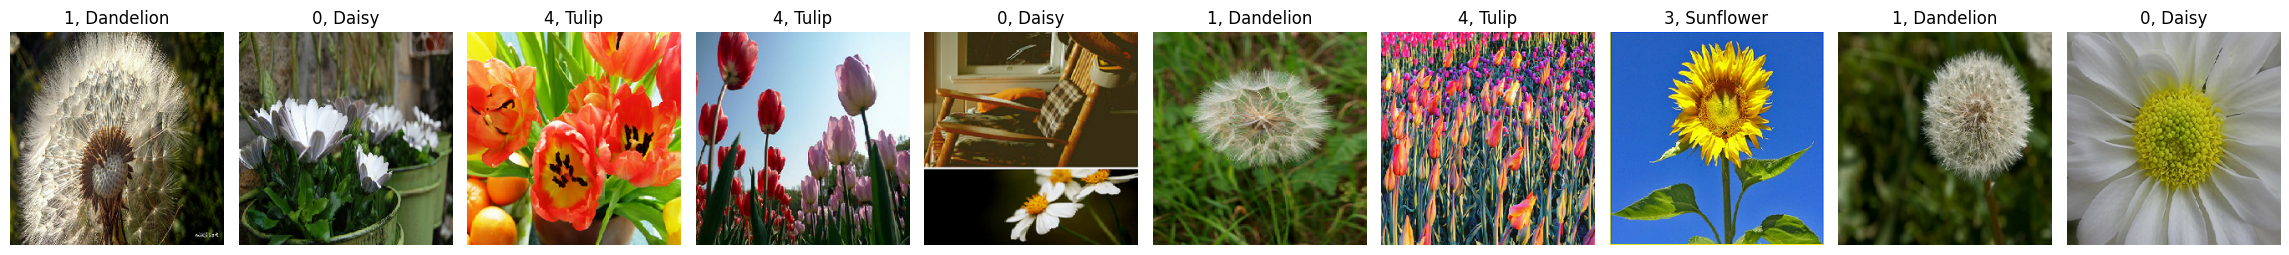

In [40]:
fig, axes = plt.subplots(1, 10, figsize=(23, 10))
for i, (x, y) in enumerate(dataset.take(10)):
  axes[i].set_title(f'{np.argmax(y[0].numpy())}, {classMap[np.argmax(y[0].numpy())]}')
  axes[i].imshow(x[0].numpy().astype("uint8"))
  axes[i].axis('off')
plt.tight_layout()
plt.show()

## Split Dataset

In [41]:
split_size = int(len(dataset) * .2)

In [42]:
train_dataset = dataset.skip(split_size)
validation_dataset = dataset.take(split_size)

In [43]:
print(len(train_dataset), len(validation_dataset))

47 11


## Creating Model

In [57]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,581,349 (128.10 MB)

 Trainable params: 33,581,221 (128.10 MB)

 Non-trainable params: 128 (512.00 B)

In [58]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs["accuracy"] > 0.99 and logs["val_accuracy"] > 0.99:
            self.model.stop_training = True

In [59]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=50, callbacks=[EarlyStopping()])

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 331ms/step - accuracy: 0.3722 - loss: 7.9662 - val_accuracy: 0.4389 - val_loss: 1.5896
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.5651 - loss: 1.1215 - val_accuracy: 0.4361 - val_loss: 1.5257
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.6798 - loss: 0.8975 - val_accuracy: 0.5156 - val_loss: 1.3993
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.7774 - loss: 0.6325 - val_accuracy: 0.5170 - val_loss: 1.3448
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.8112 - loss: 0.5709 - val_accuracy: 0.6719 - val_loss: 1.1546
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.8569 - loss: 0.4091 - val_accuracy: 0.7670 - val_loss: 1.0197
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9129 - loss: 0.2785 - val_accuracy: 0.7713 - val_loss: 0.8297
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - accuracy: 0.9375 - loss: 0.2289 - val_accur

In [46]:
model.evaluate(train_dataset)
model.evaluate(validation_dataset)

47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9789 - loss: 0.0671
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9583 - loss: 0.1710


[0.16805700957775116, 0.9588068127632141]

In [49]:
model.save("flower_classifier.h5")
model.export("flower_classifier")

Saved artifact at 'flower_classifier'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137832767788960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778330912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778325104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778318592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778324576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778322112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778324224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778320528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778319120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137832778325280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1378327673453

In [60]:
!zip -r flower_classifier.zip flower_classifier

  adding: flower_classifier/ (stored 0%)
  adding: flower_classifier/variables/ (stored 0%)
  adding: flower_classifier/variables/variables.index (deflated 65%)
  adding: flower_classifier/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: flower_classifier/saved_model.pb (deflated 85%)
  adding: flower_classifier/assets/ (stored 0%)
  adding: flower_classifier/fingerprint.pb (stored 0%)


## Testing Model Using Other Image

In [14]:
from google.colab import files
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Model/flower_classifier.h5")

In [12]:
classMap = {
    0: "Daisy",
    1: "Dandelion",
    2: "Rose",
    3: "Sunflower",
    4: "Tulip"
}

In [20]:
20 // 10

2

Saving pexels-pixabay-53584.jpg to pexels-pixabay-53584 (13).jpg
Saving pexels-pixabay-533850.jpg to pexels-pixabay-533850 (13).jpg
Saving pexels-pixabay-188972.jpg to pexels-pixabay-188972 (10).jpg
Saving pexels-sharefaith-491036-1231215.jpg to pexels-sharefaith-491036-1231215 (9).jpg
Saving pexels-pixabay-39669.jpg to pexels-pixabay-39669 (7).jpg
Saving pexels-valeriya-617965.jpg to pexels-valeriya-617965 (7).jpg
Saving pexels-lynda-sanchez-825238-2300713.jpg to pexels-lynda-sanchez-825238-2300713 (8).jpg
Saving pexels-tu-nguy-n-709154-1545582.jpg to pexels-tu-nguy-n-709154-1545582 (8).jpg
Saving pexels-luis-jimenez-1095148517-29200324.jpg to pexels-luis-jimenez-1095148517-29200324 (9).jpg
Saving pexels-peter-de-vink-288978-849403.jpg to pexels-peter-de-vink-288978-849403 (9).jpg
Saving pexels-noellegracephotos-906101.jpg to pexels-noellegracephotos-906101 (9).jpg
Saving pexels-peterfazekas-1234064.jpg to pexels-peterfazekas-1234064 (8).jpg
Saving pexels-shotbyrain-4705016.jpg to pex

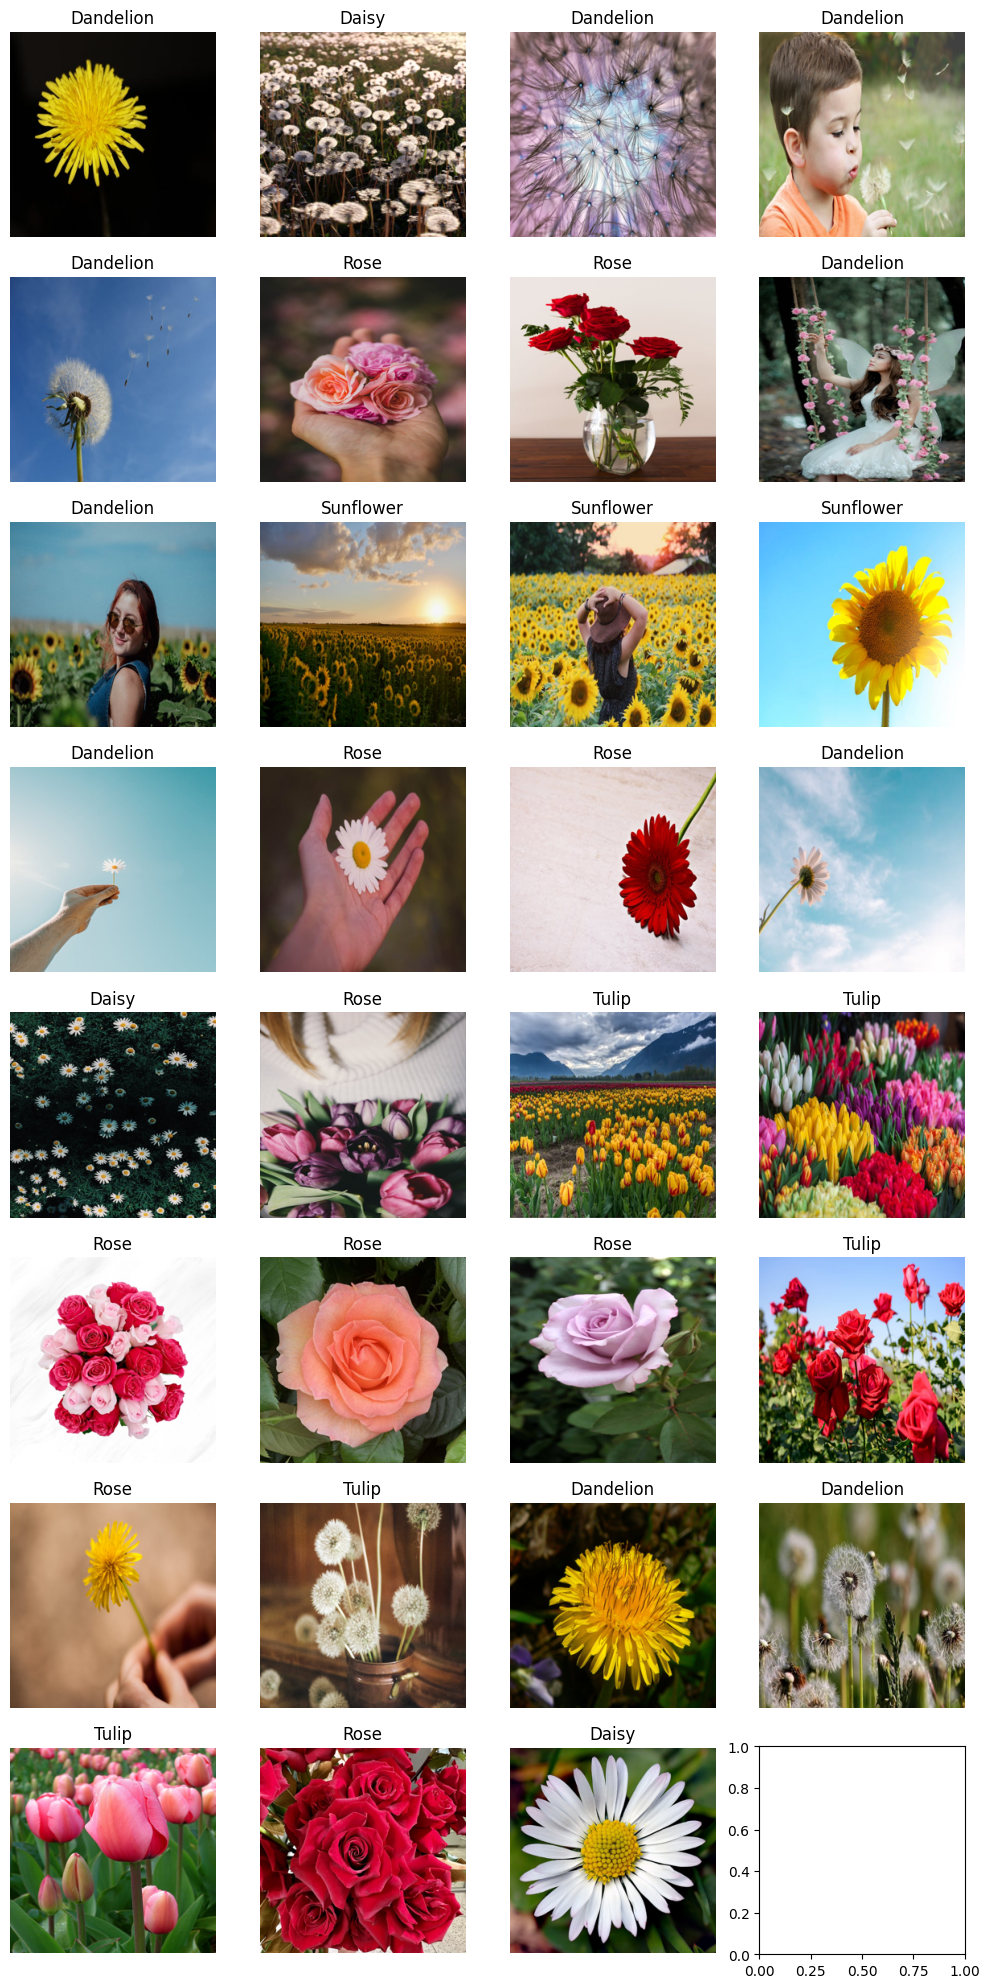

In [36]:
uploaded_image = files.upload()
fig, ax = plt.subplots(8, 4, figsize=(10, 20))
ax = ax.flatten()
for index, fn in enumerate(uploaded_image.keys()):
  path = fn
  img = Image.open(path).resize((256, 256))
  img = np.array(img)
  img = np.expand_dims(img, axis=0)
  predict = model.predict(img)
  ax[index].set_title(classMap[np.argmax(predict[0])])
  ax[index].imshow(img[0])
  ax[index].axis('off')

plt.tight_layout()
plt.show()